In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    mean_squared_error,
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score
)

[3.654951933701658, 3.1365922651933715, 17.24067348066298, 1.0858127071823203, 6.775250828729282, 2.119335359116023, 7.118925414364639, 1.4298878453038675, 2.560198342541437, 0.9918596685082871, 0.7926303867403317, 3.044879005524862, 37.901901104972374, 2.8148690607734808, 322.2731397790055, 3.164290055248619, 6.949513812154697, 1.5658425414364636, 10.345819337016579, 57.12500331491714, 2.2362022099447514, 0.4105066298342541, 2.3007071823204415, 0.44798508287292826, 5.577177900552485, 1.2601546961325971, 7.969175138121545, 1.1054646408839774, 5.474330386740331, 7.377182872928175, 0.50116408839779, 1.0794138121546957, 4.953287845303867, 0.5722701657458564, 6.4367585635359115, 0.8182116022099452, 1.192933149171271, 3.431103314917127, 2.684368508287292, 5.210603867403316, 5.517088950276243, 2.255754143646409, 4.4547486187845315, 6.520918784530388, 7.039645303867404, 7.13132320441989, 0.8302453038674034, 11.525775138121547, 2.821157458563536, 2.6293033149171277, 6.791614917127072, 1188.230

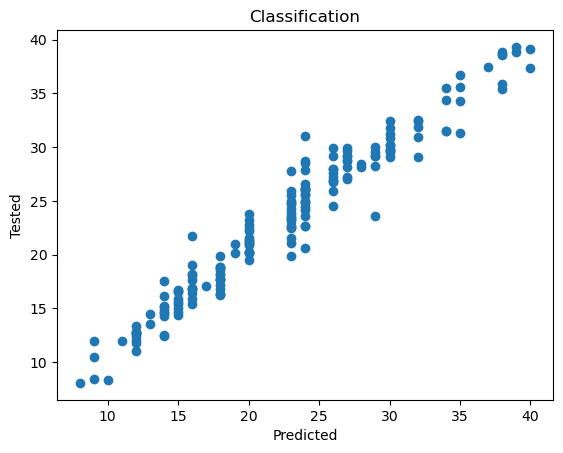

In [8]:
df = pd.read_csv("./df_weekly.csv")

companies = df.groupby('Symbol')
pred_acc = []

for i in range(len(companies)):

    X = df[['Open', 'High', 'Low', 'Close']].iloc[549 * i : 549 * i + 548]
    y = df[['Open']].iloc[549 * i + 1: 549 * i + 549]
    symbol = df[['Symbol']].iloc[549 * i]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=125
    )
    y_train = np.squeeze(y_train)

    model = GaussianNB()
    model.fit(X_train, (y_train.values).astype(int))

    y_pred = model.predict(X_test)

    accuray = accuracy_score(y_pred, (y_test.values).astype(int))
    f1 = f1_score(y_pred, (y_test.values).astype(int), average="weighted")
    mse = mean_squared_error(y_test, y_pred)

    pred_acc.append(mse)

plt.scatter(y_pred, y_test)
plt.xlabel("Predicted")
plt.ylabel("Tested")
plt.title("Classification")
plt.show()